In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet('data/Gemma/data_gemma_complete.parquet', engine='pyarrow')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 1 to 300
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Text_EN                    300 non-null    object 
 1   Text_PL                    300 non-null    object 
 2   Text_RU                    300 non-null    object 
 3   Translation_quality        300 non-null    float64
 4   Gemma_far_right_EN_answer  300 non-null    int64  
 5   Gemma_far_right_PL_answer  300 non-null    int64  
 6   Gemma_far_right_RU_answer  300 non-null    int64  
 7   Gemma_mod_cons_EN_answer   300 non-null    int64  
 8   Gemma_mod_cons_PL_answer   300 non-null    int64  
 9   Gemma_mod_cons_RU_answer   300 non-null    int64  
 10  Gemma_prog_left_EN_answer  300 non-null    int64  
 11  Gemma_prog_left_PL_answer  300 non-null    int64  
 12  Gemma_prog_left_RU_answer  300 non-null    int64  
 13  Gemma_centrist_EN_answer   300 non-null    int64  

In [4]:
gemma_cols = [col for col in data if col.startswith('Gemma')]

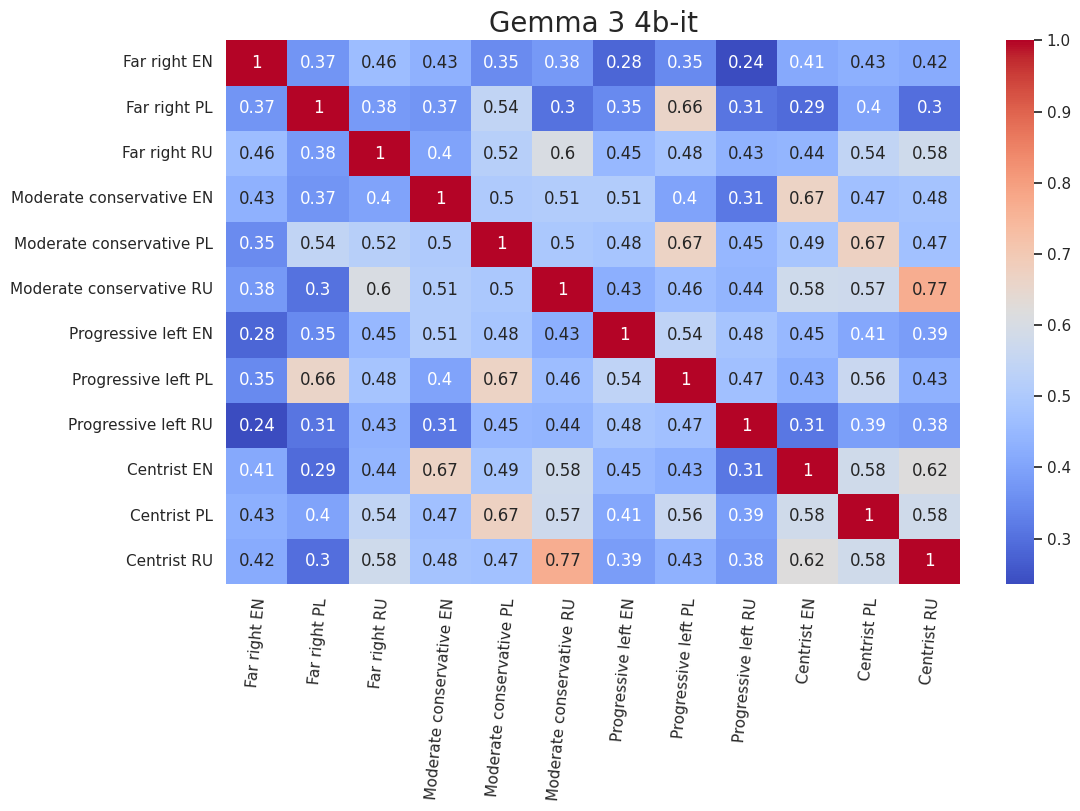

In [5]:


# Convert None values to NaN which pandas recognizes
new_data = data[data['Translation_quality'] == 1.0].drop(['Translation_quality'], axis=1)[gemma_cols].replace([None], np.nan)

# Calculate correlation - by default this uses pairwise deletion
# which means each correlation is calculated using all rows where both columns have values
corr = new_data.corr(method='pearson')

# Set up the plot
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

ticks = ['Far right EN', 'Far right PL',
       'Far right RU', 'Moderate conservative EN',
       'Moderate conservative PL', 'Moderate conservative RU',
       'Progressive left EN', 'Progressive left PL',
       'Progressive left RU', 'Centrist EN',
       'Centrist PL', 'Centrist RU']

# Create the heatmap
plot = sns.heatmap(corr, 
            xticklabels=ticks,
            yticklabels=ticks, 
            annot=True,
            cmap="coolwarm")

plot.set_xticklabels(plot.get_xticklabels(), rotation=85)
plot.set_title('Gemma 3 4b-it', fontsize=20)

plt.tight_layout()

plt.savefig('data/Gemma/correlation_plot_gemma.png', format='png', bbox_inches='tight')
plt.show()

In [6]:
corr

,Gemma_far_right_EN_answer,Gemma_far_right_PL_answer,Gemma_far_right_RU_answer,Gemma_mod_cons_EN_answer,Gemma_mod_cons_PL_answer,Gemma_mod_cons_RU_answer,Gemma_prog_left_EN_answer,Gemma_prog_left_PL_answer,Gemma_prog_left_RU_answer,Gemma_centrist_EN_answer,Gemma_centrist_PL_answer,Gemma_centrist_RU_answer
Gemma_far_right_EN_answer,1.000000,0.368278,0.461396,0.432564,0.351416,0.379252,0.282905,0.348834,0.236043,0.413337,0.429072,0.417704
Gemma_far_right_PL_answer,0.368278,1.000000,0.381264,0.369235,0.544447,0.302932,0.347099,0.659884,0.310292,0.291870,0.397622,0.296393
Gemma_far_right_RU_answer,0.461396,0.381264,1.000000,0.398073,0.520552,0.604211,0.449336,0.482016,0.434882,0.441940,0.543863,0.576481
Gemma_mod_cons_EN_answer,0.432564,0.369235,0.398073,1.000000,0.504454,0.508299,0.508496,0.397298,0.314465,0.666448,0.470676,0.479523
Gemma_mod_cons_PL_answer,0.351416,0.544447,0.520552,0.504454,1.000000,0.495582,0.484371,0.667573,0.445024,0.486600,0.672913,0.474405
Gemma_mod_cons_RU_answer,0.379252,0.302932,0.604211,0.508299,0.495582,1.000000,0.425328,0.462315,0.440566,0.576334,0.573560,0.769771
Gemma_prog_left_EN_answer,0.282905,0.347099,0.449336,0.508496,0.484371,0.425328,1.000000,0.539699,0.483569,0.450671,0.409019,0.387110
Gemma_prog_left_PL_answer,0.348834,0.659884,0.482016,0.397298,0.667573,0.462315,0.539699,1.000000,0.471426,0.428379,0.564127,0.432364
Gemma_prog_left_RU_answer,0.236043,0.310292,0.434882,0.314465,0.445024,0.440566,0.483569,0.471426,1.000000,0.313375,0.389193,0.377894
Gemma_centrist_EN_answer,0.413337,0.291870,0.441940,0.666448,0.486600,0.576334,0.450671,0.428379,0.313375,1.000000,0.580092,0.619180


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.linalg import eigvalsh
import math

R_gemma = corr.values    # now R_gemma[i,j] works with integer i,j

def cross_lang_consistency(R):
    personas = {
        'Far-Right': [0,1,2],
        'Mod-Con':   [3,4,5],
        'Prog-Left': [6,7,8],
        'Centrist':  [9,10,11]
    }
    avgs = []
    for idxs in personas.values():
        avgs.append(np.mean([R[i,j] for i,j in combinations(idxs,2)]))
    return np.mean(avgs)

def separation_score(R):
    personas = {
        'Far-Right': [0,1,2],
        'Mod-Con':   [3,4,5],
        'Prog-Left': [6,7,8],
        'Centrist':  [9,10,11]
    }
    within = []
    between = []
    all_idx = range(R.shape[0])
    for name, idxs in personas.items():
        for i,j in combinations(idxs,2):
            within.append(R[i,j])
    for i,j in combinations(all_idx,2):
        # find which persona each index belongs to
        gi = next(g for g,idxs in personas.items() if i in idxs)
        gj = next(g for g,idxs in personas.items() if j in idxs)
        if gi != gj:
            between.append(R[i,j])
    return np.mean(within) - np.mean(between)

def effective_rank(R):
    lam = eigvalsh(R)
    p = lam / lam.sum()
    H = -np.sum(p * np.log(p + 1e-20))
    return math.exp(H)

# 4) Compute and compare
for name, R in [('Gemma', R_gemma)]:  # add ('Mistral', R_mistral) once you load it
    print(f"{name}:")
    print("  Cross-lang consistency:", cross_lang_consistency(R))
    print("  Separation score S:    ", separation_score(R))
    print("  Effective rank:        ", effective_rank(R))


Gemma:
  Cross-lang consistency: 0.4995617854435861
  Separation score S:     0.04900527472816674
  Effective rank:         6.062225611363859
